<a href="https://colab.research.google.com/github/glenmiracle18/Gropu-5_Water_Quality_Model-/blob/sifa-kaveza/Sifa_Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


# Data Handling and Pre-Processing


In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/water_potability.csv'


Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Plot the Data Appropriately

In [4]:
#Handling missing values
df = df.fillna(df.mean())

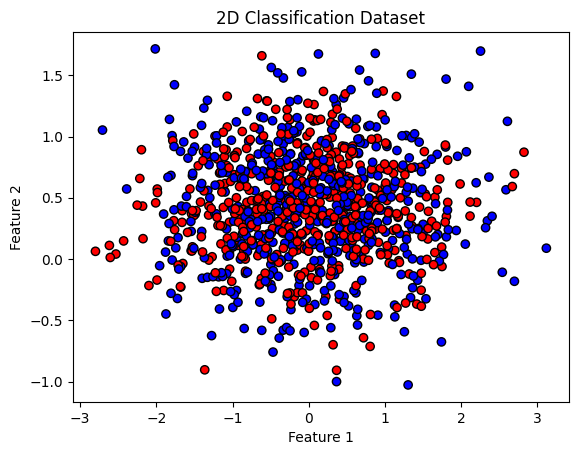

In [5]:
#2D classification dataset
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=1000,
    n_clusters_per_class=1,
    random_state=42
)

# Data Visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("2D Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [6]:
#Data processing
X = df.drop('Potability', axis=1)
y = df['Potability']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (3276, 9)
Target shape: (3276,)


In [7]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features:", X_scaled[:5])

Scaled features: [[-6.04313345e-16  2.59194711e-01 -1.39470871e-01  1.12414846e-01
   9.61357416e-01  1.70895423e+00 -1.18065057e+00  1.30614943e+00
  -1.28629758e+00]
 [-2.28933938e+00 -2.03641367e+00 -3.85986650e-01 -3.07693708e-01
   3.14598714e-15  2.06257500e+00  2.70597240e-01 -6.38479983e-01
   6.84217891e-01]
 [ 6.92867789e-01  8.47664833e-01 -2.40047337e-01  1.36059386e+00
   3.14598714e-15 -9.40321148e-02  7.81116857e-01  1.50940884e-03
  -1.16736546e+00]
 [ 8.40950402e-01  5.47651374e-01  4.93304442e-04  5.92007821e-01
   6.39518996e-01 -7.78829962e-01  1.25513443e+00  2.15287376e+00
   8.48411520e-01]
 [ 1.36856889e+00 -4.64429087e-01 -4.60248570e-01 -3.63697933e-01
  -6.54176512e-01 -3.43938909e-01 -8.24357169e-01 -2.18159864e+00
   1.38785531e-01]]


In [8]:
#Data splitting
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

Training set size: (2293, 9)
Validation set size: (491, 9)
Testing set size: (492, 9)


# Defining The Model

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [72]:
#Model Definition with L2 Regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
#Model Compilation
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

#Training The Model

In [74]:
from sklearn.metrics import f1_score


In [75]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred_binary)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5359 - loss: 1.2746 - val_accuracy: 0.6314 - val_loss: 1.0778
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6085 - loss: 1.0427 - val_accuracy: 0.6354 - val_loss: 0.9186
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6059 - loss: 0.9017 - val_accuracy: 0.6375 - val_loss: 0.8182
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6045 - loss: 0.8151 - val_accuracy: 0.6517 - val_loss: 0.7572
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6116 - loss: 0.7609 - val_accuracy: 0.6517 - val_loss: 0.7178
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6331 - loss: 0.7175 - val_accuracy: 0.6477 - val_loss: 0.6932
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6307 - loss: 0.7044 - val_accuracy: 0.6538 - val_loss: 0.6764
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6259 - loss: 0.6836 - val_accuracy: 0.6497 - val_loss:

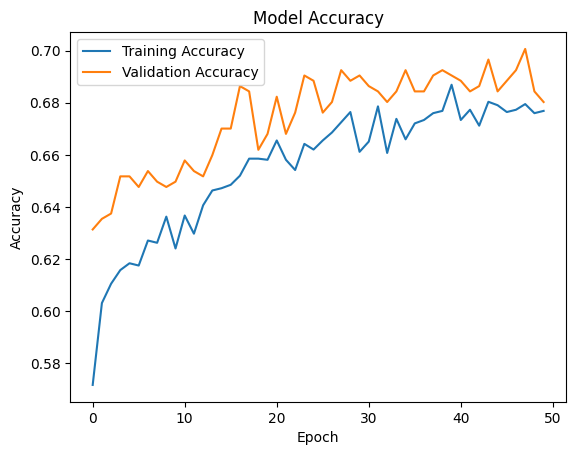

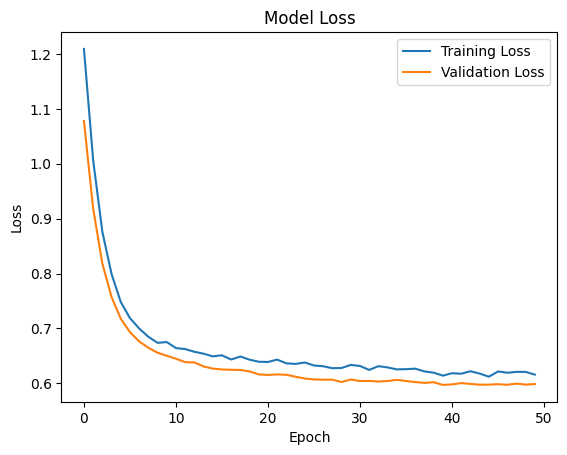

In [76]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Example: True labels and predicted labels
y_true = [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]  # Replace with your true labels
y_pred = [0, 0, 1, 0, 0, 1, 1, 1, 0, 0]  # Replace with your predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_true, y_pred, output_dict=True)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Extract the required metrics
precision_0 = report['0']['precision']
recall_0 = report['0']['recall']
f1_score_0 = report['0']['f1-score']
support_0 = report['0']['support']

precision_1 = report['1']['precision']
recall_1 = report['1']['recall']
f1_score_1 = report['1']['f1-score']
support_1 = report['1']['support']

accuracy = accuracy_score(y_true, y_pred)
macro_avg = report['macro avg']
weighted_avg = report['weighted avg']

# Print the metrics
print("\nMetrics Summary:")
print(f"Class 0: Precision = {precision_0:.4f}, Recall = {recall_0:.4f}, F1-Score = {f1_score_0:.4f}, Support = {support_0}")
print(f"Class 1: Precision = {precision_1:.4f}, Recall = {recall_1:.4f}, F1-Score = {f1_score_1:.4f}, Support = {support_1}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Average: Precision = {macro_avg['precision']:.4f}, Recall = {macro_avg['recall']:.4f}, F1-Score = {macro_avg['f1-score']:.4f}")
print(f"Weighted Average: Precision = {weighted_avg['precision']:.4f}, Recall = {weighted_avg['recall']:.4f}, F1-Score = {weighted_avg['f1-score']:.4f}")


Confusion Matrix:
[[4 1]
 [2 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10


Metrics Summary:
Class 0: Precision = 0.6667, Recall = 0.8000, F1-Score = 0.7273, Support = 5.0
Class 1: Precision = 0.7500, Recall = 0.6000, F1-Score = 0.6667, Support = 5.0
Accuracy: 0.7000
Macro Average: Precision = 0.7083, Recall = 0.7000, F1-Score = 0.6970
Weighted Average: Precision = 0.7083, Recall = 0.7000, F1-Score = 0.6970


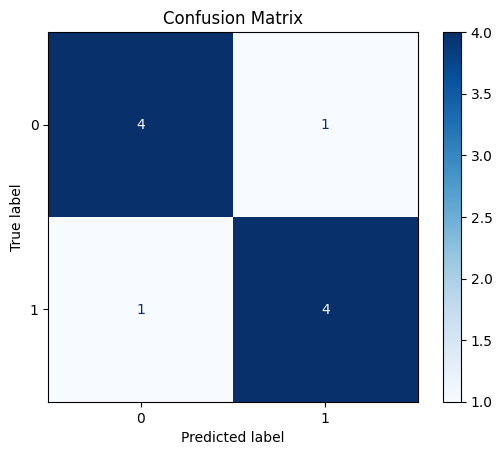

In [78]:
#Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()